In [1]:
#The path file assumes you have a directory structure with cmdstanpy sitting at the top with subdirectories 
from paths import *

The route directory: direc: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\
Will get code from: codepath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\code
Will send code to: outpath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\output
If data is needed it will look in: datapath:  C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\data2


In [2]:
import cmdstanpy
from cmdstanpy import CmdStanModel
from stancodes import *  #This file is in the code directory, is in the code directory

In [3]:
#Compile the HB stan code, will only do this once
stan_file = join(codepath,'HBL2.stan')
model = CmdStanModel(stan_file=stan_file)

In [4]:
sys.path.append(datapath)
from bio3loadindata3 import *

In [5]:
x=[array(X0_30),array(X1_30),array(X2_30)]
#for i in range(3):
    #x[i][:,0]=x[i][:,0]/5

In [6]:
x[1]

array([[-1.        ,  0.41666667,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.3       ,  0.        ,  0.75      , ...,  0.58333333,
         0.        ,  0.        ],
       [-1.        ,  0.16666667,  0.75      , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.05      ,  0.75      ,  0.16666667, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.        , ...,  0.        ,
         0.75      ,  0.        ],
       [-1.        ,  0.        ,  0.58333333, ...,  0.        ,
         1.        ,  0.        ]])

In [7]:
Y=y30+1
ids=id30
N=int(max(ids))
T=len(Y)
K=shape(X0_30)[1]
[N,T,K]

[201, 1608, 7]

In [8]:
frame(x[1])

,0,1,2,3,4,5,6
0,-1.00,0.416667,1.000000,0.000000,0.000000,0.000000,0.0
1,-0.30,0.000000,0.750000,0.000000,0.583333,0.000000,0.0
2,-1.00,0.166667,0.750000,0.000000,0.000000,0.000000,0.0
3,-1.00,0.000000,0.000000,0.000000,1.000000,0.416667,0.0
4,-0.10,0.000000,1.000000,0.000000,0.000000,0.750000,0.0
...,...,...,...,...,...,...,...
1603,-1.00,0.000000,1.000000,0.000000,0.583333,0.000000,0.0
1604,-0.10,0.000000,0.000000,0.250000,0.000000,1.000000,0.0
1605,-0.05,0.750000,0.166667,0.000000,0.000000,0.000000,0.0
1606,-1.00,0.000000,0.000000,0.166667,0.000000,0.750000,0.0


In [9]:
beta_mean=[0,0,0,0,0]    #prior mean for the wtp parameters
alpha_mean=0                 #prior mean for the scale parameters : note that this is the log or the scale
theta_mean=0                 #prior mean for the opt-out parameters

s=.3
beta_sigma=[s,s,s,s,s]     #prior std for the mean of beta   -wtps
alpha_sigma=1              #prior std for the mean if alpha -scale
theta_sigma=s              #prior std for the mean of theta -opt out

t=0.05
a=[1,1,1,1,1]              #These are gammma priors for the heterogeneous WTPs: 
b=[t,t,t,t,t]       #These are gammma priors for the heterogeneous WTPs: note that mean=a/b and var =a/b**2
a_alpha=1; b_alpha=t;         #These are gammma priors for the heterogeneous scale parameter
a_theta=1; b_theta=t;         #These are gammma priors for the heterogeneous opt out parameters

hdata = {'M': 3, 'N': N, 'K':K, 'T': rows(Y) , 'y': Y, 'ids': ids, 'x':x, 
         'beta_mean':beta_mean,'beta_sigma':beta_sigma,
         'alpha_mean':alpha_mean,'alpha_sigma':alpha_sigma,
         'theta_mean':theta_mean,'theta_sigma':theta_sigma,
         'a':a,'b':b,'a_alpha':a_alpha,'b_alpha':b_alpha,'a_theta':a_theta,'b_theta':b_theta, 
         'lower_precision_beta_ivar':  1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_alpha_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_theta_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_beta_bound':-1,           #If the parameters exceed this then this attributes wtp exceeds the largest payment
         'upper_beta_bound': 1,
         'lower_theta_bound':-1,
         'upper_theta_bound':1}

In [10]:
#Out of interest get the maximum likelihood estimates of beta_mu
import time
start=time.time()
mle = model.optimize(data=hdata)
q=mle.stan_variables()
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)
#q['beta']

17:13:42 - cmdstanpy - INFO - Chain [1] start processing
17:13:48 - cmdstanpy - INFO - Chain [1] done processing
17:13:48 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17:13:48 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17:13:48 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17:13:48 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17:13:48 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17

time taken in mins 0.09216823577880859 seconds 5.530094146728516


In [11]:
#Here we are going to use pathfinder to get some starting points
from cmdstanpy.model import cmdstan_path
pathfinder = model.pathfinder(data=hdata)

17:13:50 - cmdstanpy - INFO - Chain [1] start processing
17:16:36 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
#We are going to run 6 chains
chains=6
pathfinder_inits = pathfinder.create_inits(chains=chains)

In [13]:
#Lets fit the model using the intitialiser from pathfinder
'''
A reminder of all the possible settings
sample(data=None, chains=None, parallel_chains=None, threads_per_chain=None, seed=None, chain_ids=None, inits=None, 
iter_warmup=None, iter_sampling=None, save_warmup=False, thin=None, max_treedepth=None, metric=None, 
step_size=None, adapt_engaged=True, adapt_delta=None, adapt_init_phase=None, adapt_metric_window=None, 
adapt_step_size=None, fixed_param=False, output_dir=None, sig_figs=None, save_latent_dynamics=False, 
save_profile=False, show_progress=True, show_console=False, refresh=None, time_fmt='%Y%m%d%H%M%S', 
timeout=None, *, force_one_process_per_chain=None)
'''
chains=6
start=time.time()
fit=model.sample(data=hdata, chains=chains,iter_warmup=1000, inits=pathfinder_inits,
                 iter_sampling=2000, show_progress=True,output_dir=None,thin=1,adapt_delta=.8,max_treedepth=14)
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)

17:17:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

17:39:38 - cmdstanpy - INFO - CmdStan done processing.
17:39:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL2.stan', line 89, column 0 to column 36)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL2.stan', line 89, column 0 to column 36)
Consider re-running with show_console=True if the above output is unclear!



time taken in mins 22.54795129696528 seconds 1352.8770778179169


In [14]:
#fit.summary()

In [15]:
z=fit.stan_variables()

In [16]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if you want to change the output
savemodel(z,join(outpath,'z_niko_dce2_rescaled_prior_beta_theta_ub_lb_hbl2_20251008v2'))

In [17]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if the outpath was change
z=loadmodel(join(outpath,'z_niko_dce2_rescaled_prior_beta_theta_ub_lb_hbl2_20251008v2'))


<Axes: title={'center': 'Opt Out ASC'}>

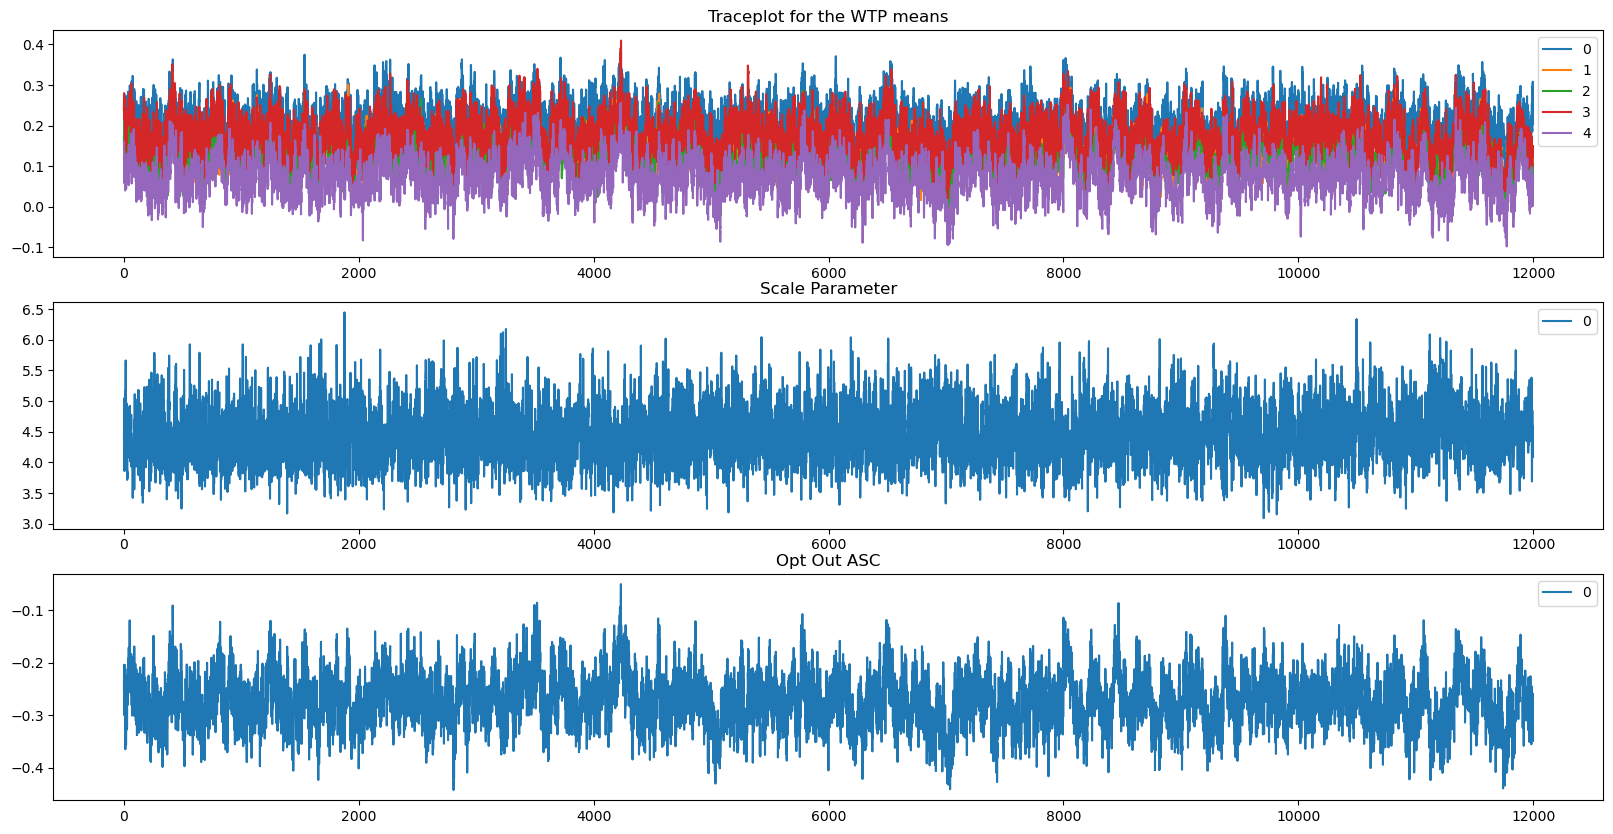

In [18]:
from shortercuts import pltsize
pltsize(10,20)
fig,ax=plt.subplots(3)
frame(z['beta_mu']).plot(title='Traceplot for the WTP means',ax=ax[0])
frame(exp(z['alpha_mu'])).plot(ax=ax[1],title='Scale Parameter')
frame(z['theta_mu']).plot(ax=ax[2],title='Opt Out ASC')

In [19]:
#print(fit.diagnose())

In [20]:
beta_mu=(5/60)*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)


,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,1.79,1.11,1.05,1.49,0.60,-136.76
std,0.39,0.38,0.36,0.39,0.41,24.96
min,0.23,-0.16,-0.27,0.10,-0.82,-221.34
25%,1.52,0.85,0.81,1.22,0.33,-153.92
50%,1.79,1.11,1.05,1.49,0.59,-137.41
75%,2.05,1.36,1.29,1.76,0.87,-120.27
max,3.16,2.76,2.52,3.41,2.13,-25.25


In [21]:
beta_mu= 5*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)

,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,107.33,66.75,63.11,89.60,36.27,-136.76
std,23.58,23.04,21.79,23.59,24.46,24.96
min,13.66,-9.89,-16.23,6.12,-49.10,-221.34
25%,91.38,51.02,48.62,73.45,19.84,-153.92
50%,107.17,66.31,62.91,89.22,35.51,-137.41
75%,122.97,81.79,77.36,105.43,52.08,-120.27
max,189.89,165.70,150.96,204.74,127.57,-25.25


In [22]:
# 95% credible intervals (2.5% and 97.5%)
beta_ci = beta_mu.quantile([0.025, 0.975]).T
theta_ci = theta_mu.quantile([0.025, 0.975]).T

# Rename columns for clarity
beta_ci.columns = ['2.5%', '97.5%']
theta_ci.columns = ['2.5%', '97.5%']

# Round and display
print("Credible Intervals for beta_mu:")
print(beta_ci.round(2))
print("\nCredible Intervals for theta_mu:")
print(theta_ci.round(2))

Credible Intervals for beta_mu:
              2.5%   97.5%
bees         61.46  153.72
sparrow      22.76  113.91
butterflies  20.42  106.57
hedgehogs    44.56  137.17
bats         -9.59   86.71

Credible Intervals for theta_mu:
     2.5%  97.5%
0 -184.39 -86.05


<Axes: title={'center': 'WTP  to avoid SQ'}, ylabel='Frequency'>

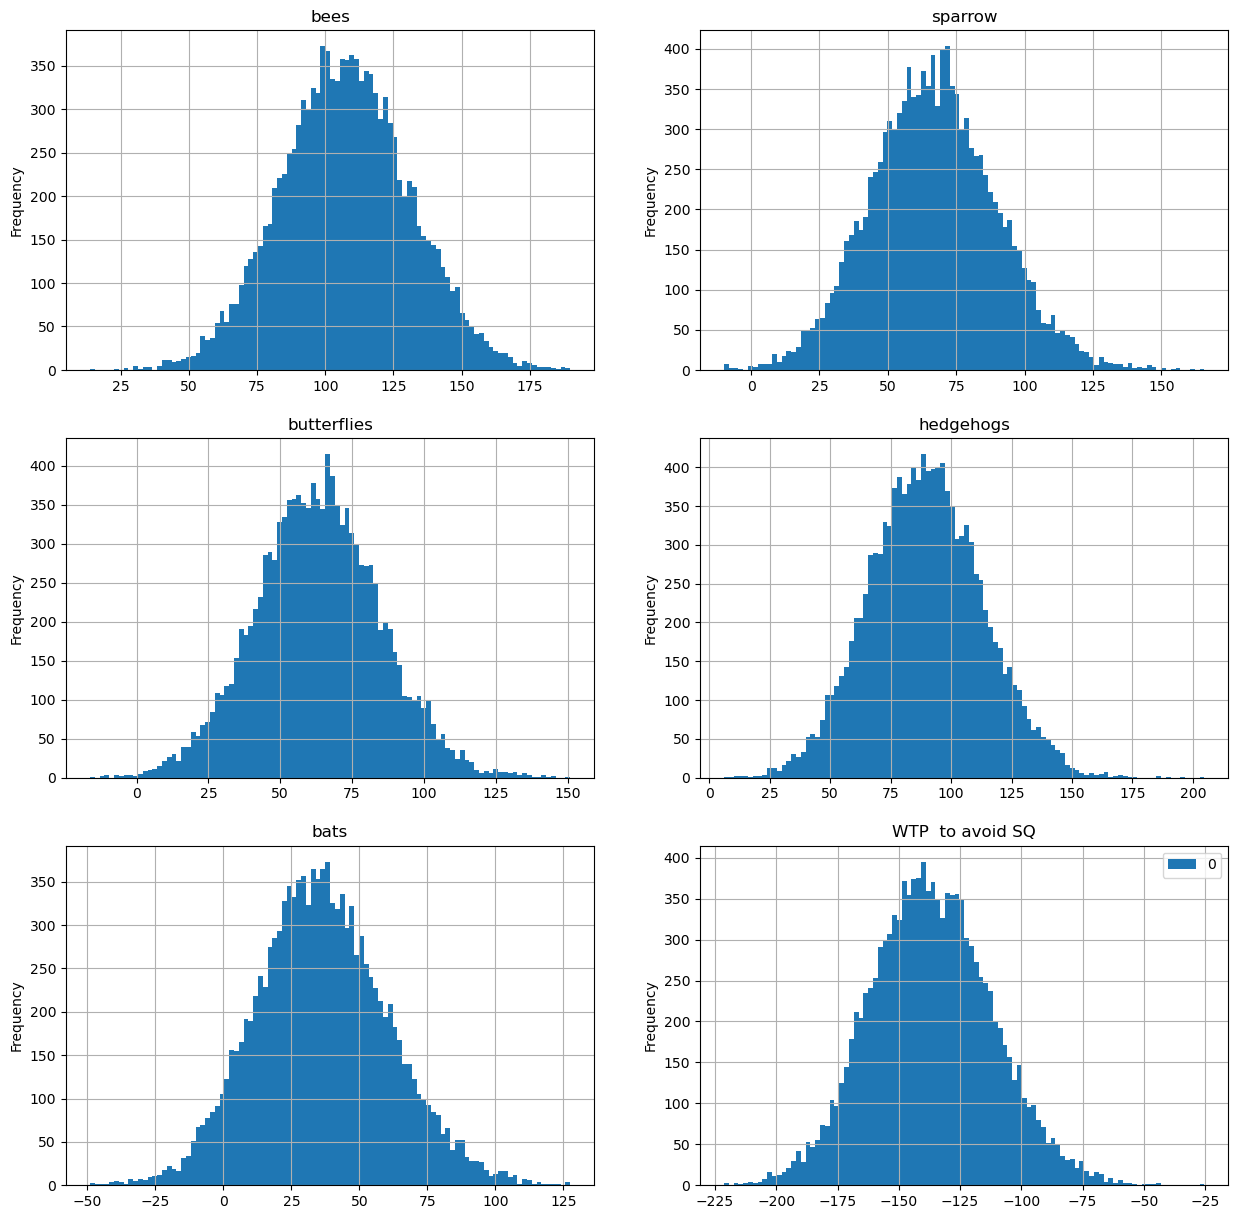

In [23]:
pltsize(15,15)
fig,ax=plt.subplots(3,2)
scale=1
(scale*beta_mu[varnames[0]]).plot(kind='hist',bins=100,ax=ax[0,0],title=varnames[0],grid=True)
(scale*beta_mu[varnames[1]]).plot(kind='hist',bins=100,ax=ax[0,1],title=varnames[1],grid=True)

(scale*beta_mu[varnames[2]]).plot(kind='hist',bins=100,ax=ax[1,0],title=varnames[2],grid=True)
(scale*beta_mu[varnames[3]]).plot(kind='hist',bins=100,ax=ax[1,1],title=varnames[3],grid=True)
(scale*beta_mu[varnames[4]]).plot(kind='hist',bins=100,ax=ax[2,0],title=varnames[4],grid=True)
(scale*theta_mu).plot(kind='hist',grid=True,bins=100,ax=ax[2,1],title='WTP  to avoid SQ')


In [24]:
#If you want the rhat values for beta_my which is a two dimensional array, 
r_hat2(z,'beta_mu',chains)

(12000, 5)


[['beta_mu', 1, 1.0084152821043864],
 ['beta_mu', 2, 1.0102072374685283],
 ['beta_mu', 3, 1.0093449036098667],
 ['beta_mu', 4, 1.0073539898991923],
 ['beta_mu', 5, 1.0082836881286894]]

In [25]:
r_hat1(z,'alpha_mu',chains)

(12000,)


['alpha_mu', 1.0023187215559382]

In [26]:
w=WAICf(z['log_lik']) 
#Look at the WAIC, note that my WAIC (produced here) gives the same results canned software for simple models
#However, I have had some divergences for some more complex models, though I am not sure why

In [27]:
#print WAIC
print(f"WAIC: {w}")

WAIC: (          waic         elpd     p_waic1     p_waic2   maxloglik    se_waic
0  2243.457864 -1121.728932  211.469718  262.564477 -868.908528  50.980017, array([[-0.22698129],
       [-0.3323166 ],
       [-0.20546564],
       ...,
       [-1.56760943],
       [-0.8408551 ],
       [-0.47527171]]))


In [28]:
import arviz as az

#  pointwise log-likelihood saved in fit
loo_result = az.loo(fit)
print(loo_result)

Computed from 12000 posterior samples and 1608 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1159.97    27.09
p_loo      300.80        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1485   92.4%
   (0.70, 1]   (bad)       123    7.6%
   (1, Inf)   (very bad)    0    0.0%



In [29]:
betas=[]
for k in range(shape(z['beta'])[2]):
    beta1=[]
    for i in range(shape(z['beta'])[1]):
        beta1+=[float(z['beta'][:,i,k].mean())]
    betas+=[beta1]
betas=(500/60)*frame(betas) .T
betas.columns=beta_mu.columns
#betas

<Axes: ylabel='Frequency'>

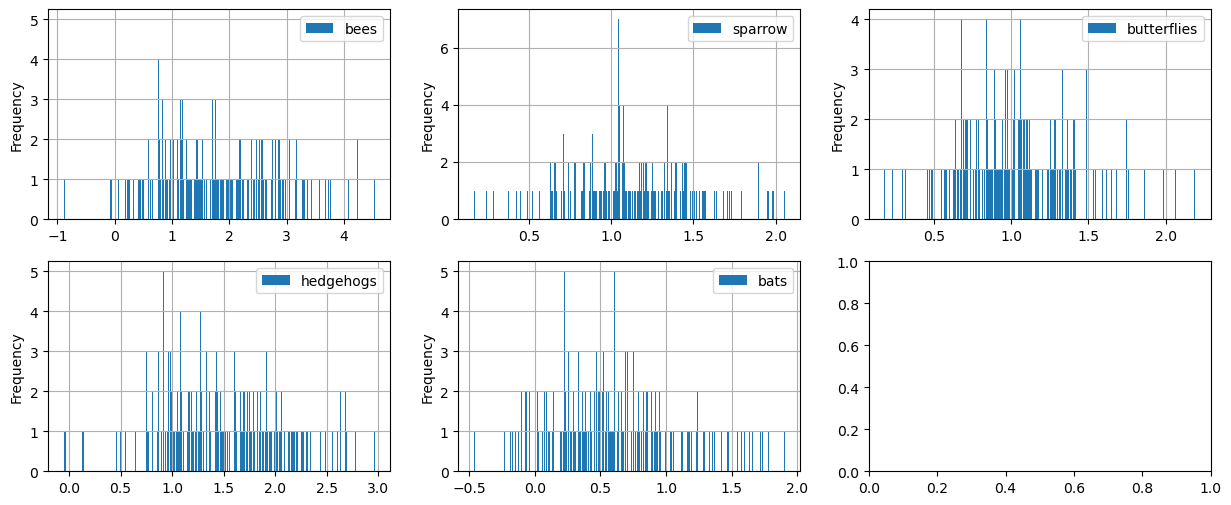

In [30]:
pltsize(6,15)
fig,ax=plt.subplots(2,3)
['bees','sparrow','butterflies','hedgehogs','bats']
betas.plot(kind='hist',y='bees',bins=383,ax=ax[0,0],grid=True)
betas.plot(kind='hist',y='sparrow',bins=383,ax=ax[0,1],grid=True)
betas.plot(kind='hist',y='butterflies',bins=383,ax=ax[0,2],grid=True)
betas.plot(kind='hist',y='hedgehogs',bins=383,ax=ax[1,0],grid=True)
betas.plot(kind='hist',y='bats',bins=383,ax=ax[1,1],grid=True)


In [31]:
exp(1)

2.718281828459045

In [32]:
exp(1+1/2)

4.4816890703380645

<Axes: >

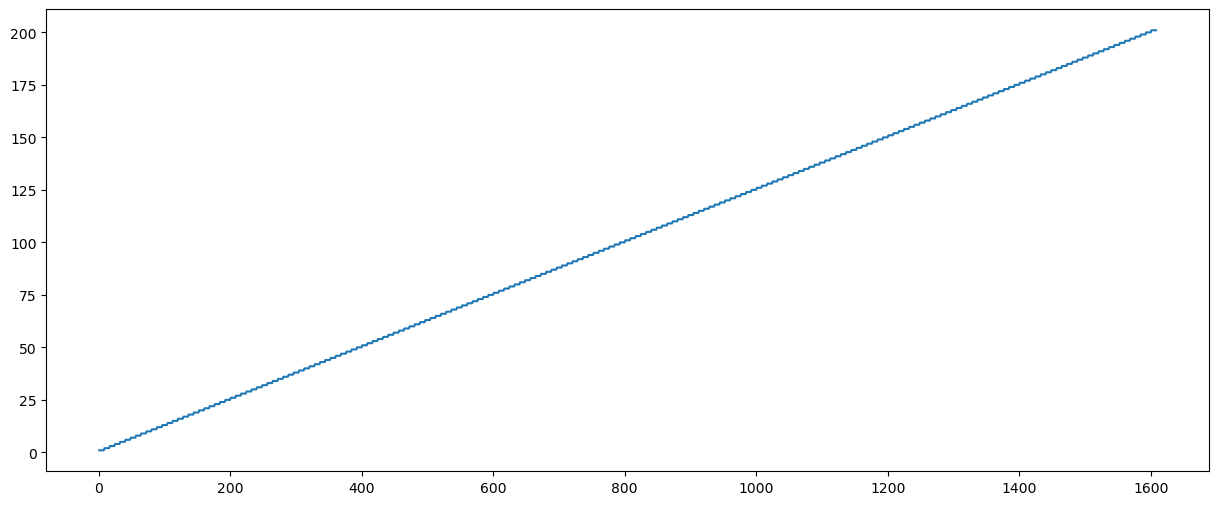

In [33]:
ids.plot()

In [34]:
x[0]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [35]:
x[2]

array([[-0.1       ,  0.        ,  0.41666667, ...,  0.41666667,
         0.        ,  0.        ],
       [-1.        ,  1.        ,  0.        , ...,  0.        ,
         0.58333333,  0.        ],
       [-0.05      ,  0.        ,  0.        , ...,  0.        ,
         0.16666667,  0.        ],
       ...,
       [-0.4       ,  0.        ,  0.        , ...,  0.58333333,
         0.        ,  0.        ],
       [-0.6       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [36]:
print("df1 attribute ranges:")
print(df1.round(3))

df1 attribute ranges:
bees1           60.0
sparrows1       60.0
butterflies1    60.0
hedgehogs1      60.0
bats1           60.0
tax1             1.0
dtype: float64


In [37]:
import pandas as pd

# Check the first design matrix (e.g., option A) as a DataFrame
pd.DataFrame(x[1]).describe()

,0,1,2,3,4,5,6
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.0
mean,-0.523563,0.202270,0.306333,0.282857,0.316646,0.243522,0.0
std,0.408734,0.354222,0.396478,0.388306,0.388437,0.361311,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,-0.100000,0.250000,0.750000,0.750000,0.583333,0.583333,0.0
max,-0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [38]:
import pandas as pd
pd.DataFrame(X0_30).describe()

,5,0,1,2,3,4,sq
count,1608.0,1608.0,1608.0,1608.0,1608.0,1608.0,1608.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
print(sq_)

  bees1 sparrows1 butterflies1 hedgehogs1 bats1 tax1
0   0.0       0.0          0.0        0.0   0.0  0.0


In [40]:
pd.DataFrame(X1_30).describe()

,5,0,1,2,3,4,sq
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.0
mean,-0.523563,0.202270,0.306333,0.282857,0.316646,0.243522,0.0
std,0.408734,0.354222,0.396478,0.388306,0.388437,0.361311,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,-0.100000,0.250000,0.750000,0.750000,0.583333,0.583333,0.0
max,-0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [41]:
pd.DataFrame(X2_30).describe()

,5,0,1,2,3,4,sq
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.0
mean,-0.360864,0.305245,0.232328,0.273425,0.199368,0.275549,0.0
std,0.352908,0.391428,0.357556,0.383135,0.347844,0.367222,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,-0.100000,0.583333,0.416667,0.583333,0.250000,0.583333,0.0
max,-0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
